## Credit Card Fraud Detection



**Problem** **Statement** :- The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

**Understanding** **and** **defining** **fraud** :-
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

1. Manipulation/alteration of genuine cards
2. Creation of counterfeit cards
3. Stealing/loss of credit cards
4. Fraudulent telemarketing

**Dataset** :- The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

**Why is this a significant problem ?**
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In [1]:
#This step is only required in Google Colab to upload the .csv file 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

## 2. Reading the data and checking for its structure

In [3]:
# Reading the data file provided and storing it in a dataframe df and inspecting it 
df = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking the number of rows and columns in the dataframe
df.shape

(284807, 31)

In [5]:
# Checking the summary for the numeric columns 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking conscise summary of all columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking for percentage of missing values in every column
import plotly.express as px

missed = pd.DataFrame()
missed['column'] = df.columns

missed['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missed = missed[missed['percent']>0].sort_values('percent')

fig = px.bar(
    missed, 
    x='percent',
    y="column", 
    orientation='h', 
    title='Missed values percent for every column', 
    height=1700, 
    width=800
)

fig.show()

**Inference** :- There are no missing values

##3 . EDA

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

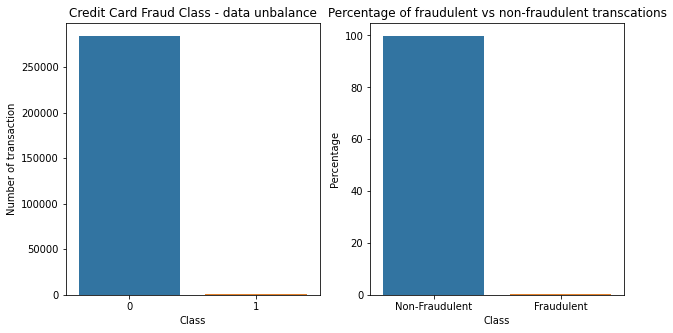

In [9]:
# Creatin a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()


**Inference** : -The given data seems to be highly imbalanced

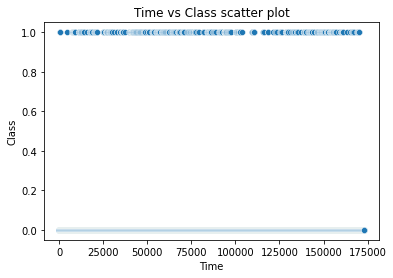

In [10]:
# Creating a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

**Inference** :- There seems to be no difference in fraudulent activities or non-fraudulent activities with respect to time 

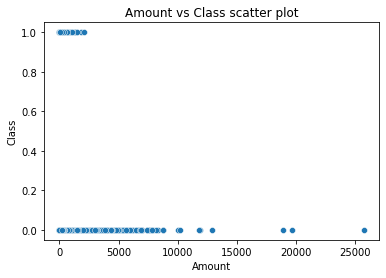

In [11]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

**Inference** :- There seems to be no impact of Amount  

In [12]:
# Finding correlation in the dataset:
cor = df.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

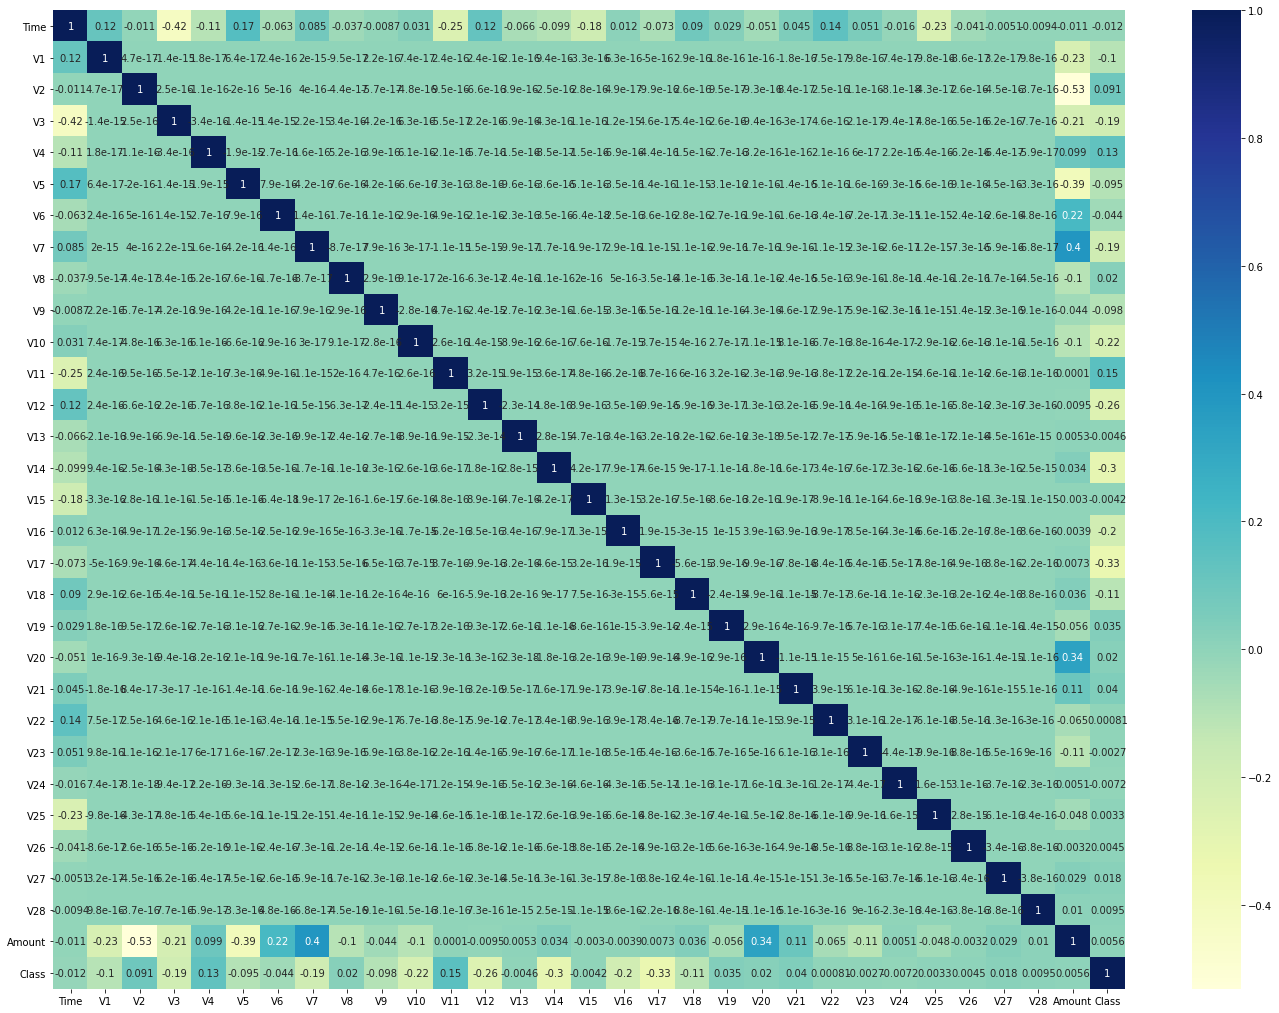

In [13]:
# Plotting correlations on a heatmap
plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [15]:
# Creating Derived columns to observe the distribution of classes with time 
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)


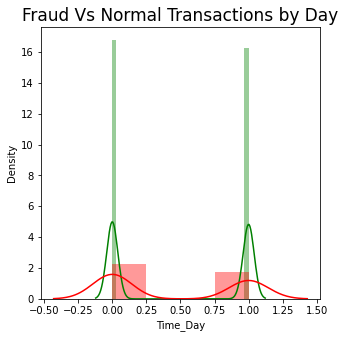

In [16]:
# Fraud Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

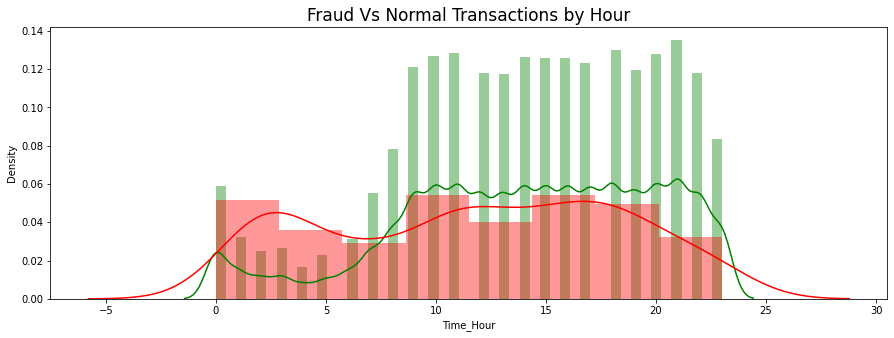

In [17]:
# Fraud Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

In [18]:
# Dropping unnecessary columns
df = df.drop("Time", axis = 1)


<Figure size 432x288 with 0 Axes>

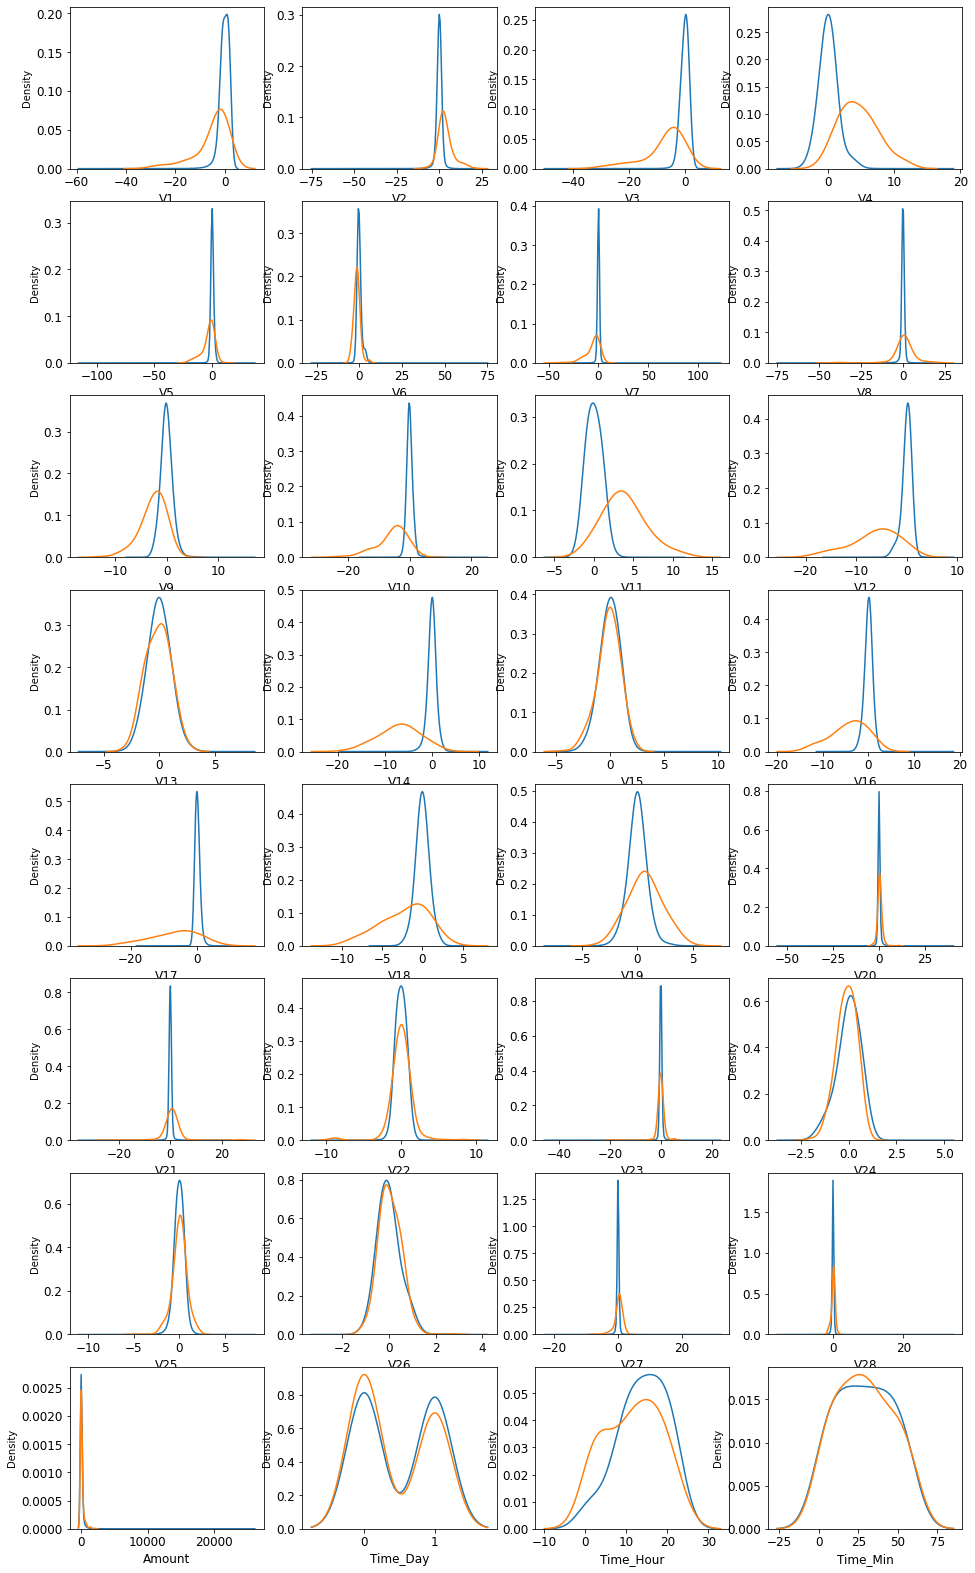

In [19]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
var.remove("Class")
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

## 4 . Model Building and Evaluation 

### Splitting the data into train & test data

In [20]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [21]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [22]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

In [23]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [25]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Day,Time_Hour,Time_Min
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356,0.033176,-0.489419,0.022104


In [26]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [27]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

## Model Building
- Build different models on the imbalanced dataset and see the result

In [29]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.998271
1    0.001729
Name: Class, dtype: float64

**1. Logistic Regression on Imbalanced data**

In [30]:
# Logistic Regression
from sklearn import linear_model #import the package

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]} #--> list of values
folds =  KFold(n_splits=5, shuffle=True, random_state=4) #--> list of values

In [31]:
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Best ROC AUC score:  0.9806652064906054
Best hyperparameters:  {'C': 0.01}


In [32]:
# Cross Validation Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.756057,0.181870,0.033502,0.001698,0.01,{'C': 0.01},0.969003,0.988022,0.991970,0.971169,0.983162,0.980665,0.009103,1,0.987203,0.982208,0.981228,0.987066,0.982118,0.983964,0.002611
1,4.579461,0.324743,0.034974,0.002206,0.1,{'C': 0.1},0.972481,0.985365,0.989323,0.964192,0.979994,0.978271,0.009024,3,0.985013,0.980038,0.979846,0.986489,0.981108,0.982499,0.002730
2,4.178964,0.087624,0.033535,0.000912,1,{'C': 1},0.974942,0.986253,0.987154,0.963018,0.980103,0.978294,0.008829,2,0.983532,0.978995,0.979510,0.986157,0.980948,0.981828,0.002676
3,4.242883,0.130863,0.034163,0.002134,10,{'C': 10},0.975903,0.984736,0.986115,0.959473,0.980792,0.977404,0.009643,6,0.983388,0.978470,0.979767,0.985745,0.981472,0.981769,0.002585
4,4.316620,0.224726,0.034000,0.001173,100,{'C': 100},0.976031,0.983916,0.986296,0.963155,0.980404,0.977960,0.008171,4,0.983152,0.978527,0.979554,0.986017,0.980673,0.981584,0.002698
5,4.114697,0.107761,0.032338,0.004936,1000,{'C': 1000},0.975670,0.984332,0.986404,0.962838,0.980094,0.977868,0.008370,5,0.983499,0.978555,0.979635,0.986178,0.981068,0.981787,0.002750


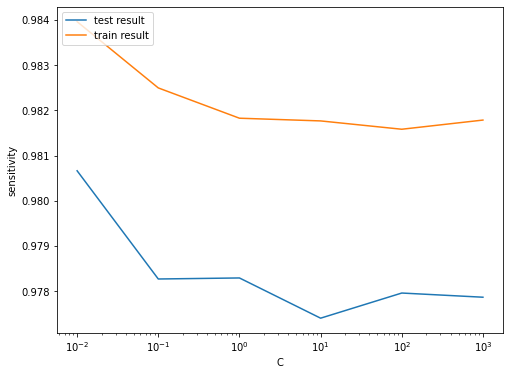

In [33]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')


In [34]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Creating function to display ROC-AUC score, f1 score and classification report
def predict_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [36]:
y_train_pred = log_reg_imb_model.predict(X_train)

In [37]:
# Creating a Classification Report
predict_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [38]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [39]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

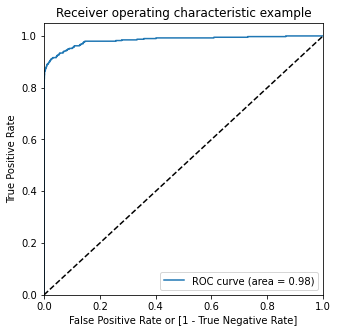

In [40]:
# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [41]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
predict_scores(y_test, y_test_pred)

F1 Score: 69.51%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

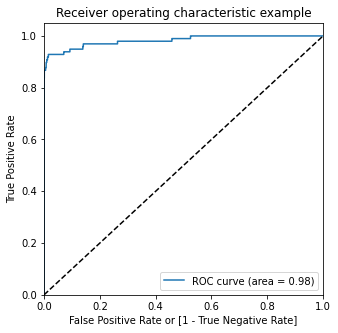

In [43]:
# Plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

**2. Decision Tree on Imbalanced data**

In [44]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [45]:
# Cross-Validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.804629,0.091946,0.051448,0.001745,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912624,0.927349,0.951706,0.930560,0.016116,4
1,5.742046,0.007654,0.055432,0.004927,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912633,0.927349,0.951695,0.930559,0.016108,5
2,5.751712,0.011052,0.052482,0.005130,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,5.705645,0.059788,0.047950,0.000836,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,11.241786,0.070393,0.055290,0.003268,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934956,0.931266,0.915730,0.927318,0.008331,7
5,11.237370,0.148993,0.052188,0.001031,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934847,0.923876,0.915755,0.924826,0.007823,8
6,11.165067,0.020059,0.052109,0.000996,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948452,0.930641,0.915655,0.931583,0.013406,3
7,11.123410,0.118090,0.047117,0.008899,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948474,0.930640,0.908152,0.929088,0.016498,6


In [46]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9338362614319525
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [47]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [48]:
# Creating a Classification Report
y_train_pred = dt_imb_model.predict(X_train)
predict_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



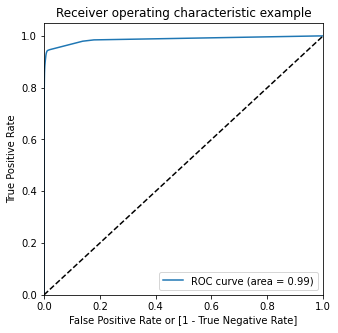

In [49]:
# Plotting ROC curve
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_proba)

In [50]:
y_test_pred = dt_imb_model.predict(X_test)
predict_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



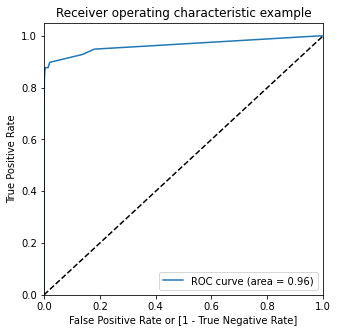

In [51]:
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

**3. XGBoost Model with Imbalanced Data**

In [52]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 14.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [53]:
# Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.986986,0.914238,0.424464,0.006444,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.974407,0.970055,0.982290,0.975584,0.005064,4,0.999680,0.999858,0.999500,0.999679,0.000146
1,50.925714,0.415476,0.420333,0.005243,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978482,0.975815,0.985159,0.979819,0.003930,2,0.999961,0.999960,0.999861,0.999927,0.000047
2,52.057383,0.314528,0.418411,0.004475,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.983404,0.973638,0.990539,0.982527,0.006928,1,0.999929,0.999903,0.999904,0.999912,0.000012
3,40.093771,0.191957,0.424778,0.003403,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.964664,0.958744,0.981501,0.968303,0.009640,6,0.999977,0.999999,0.999979,0.999985,0.000010
4,50.255453,0.475098,0.433015,0.008390,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975420,0.970657,0.980350,0.975475,0.003958,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,51.611462,0.346990,0.433267,0.004896,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977223,0.963337,0.987680,0.976080,0.009971,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [54]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9825272736726888
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [55]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [56]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [57]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)
predict_scores(y_train, y_train_pred)

F1 Score: 89.5%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



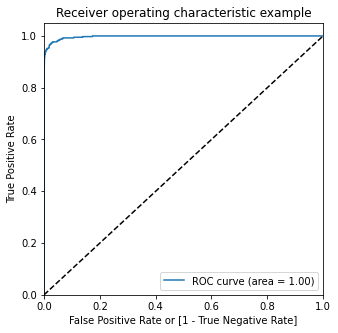

In [58]:
# Plotting ROC Curve
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [59]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
predict_scores(y_test, y_test_pred)

F1 Score: 86.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



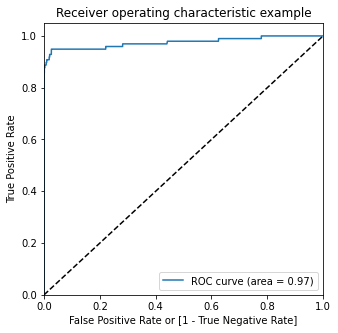

In [60]:
# Plotting the ROC curve
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


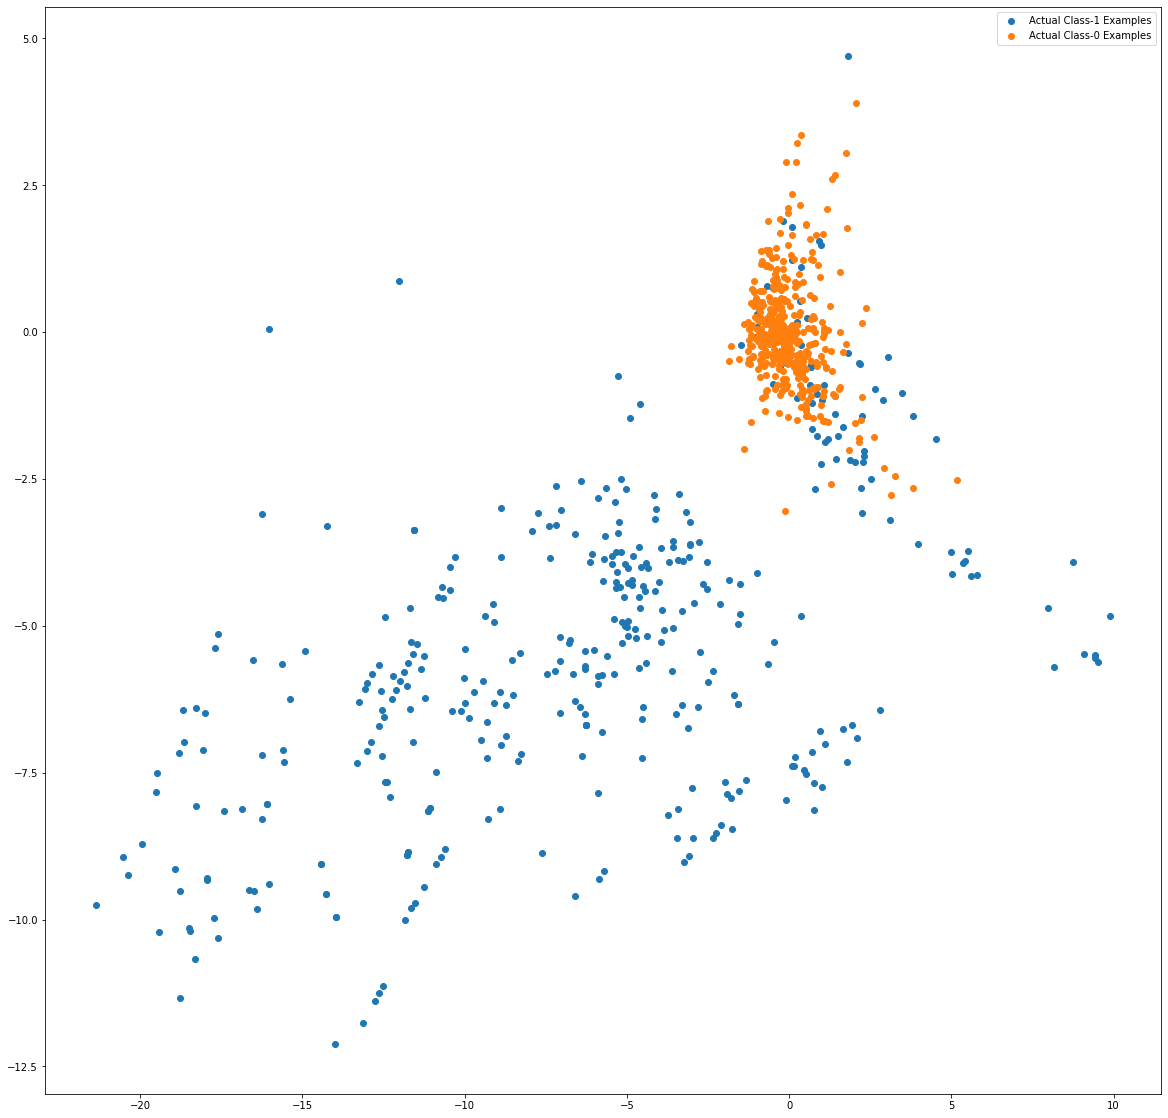

In [61]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [62]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9973085294636005
Threshold= 0.0016721514


**4. KNN Model with Imbalanced Data**

In [63]:
#Evaluate KNN  model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
#create KNN model and fit the model with train dataset
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)

In [64]:
model_cv = GridSearchCV(estimator = knn, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=16, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
y_train_pred = knn.predict(X_train)

predict_scores(y_train, y_train_pred)

F1 Score: 83.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.93      0.76      0.84       394

    accuracy                           1.00    227845
   macro avg       0.96      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845



**5. SVM Model with Imbalanced Data**

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

clf = SVC(kernel='sigmoid', random_state=42)
clf.fit(X_train,y_train)
y_pred_SVM = clf.predict(X_test)
SVM_Score = accuracy_score(y_test,y_pred_SVM)
print("accuracy_score : {0}".format(SVM_Score))

accuracy_score : 0.998735999438222


In [69]:
# Run classifier
classifier = SVC(kernel='sigmoid' , probability=True)
svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

SVM roc_value: 0.6804292447142053
SVM threshold: 0.011654896465455995
ROC for the test dataset 68.0%


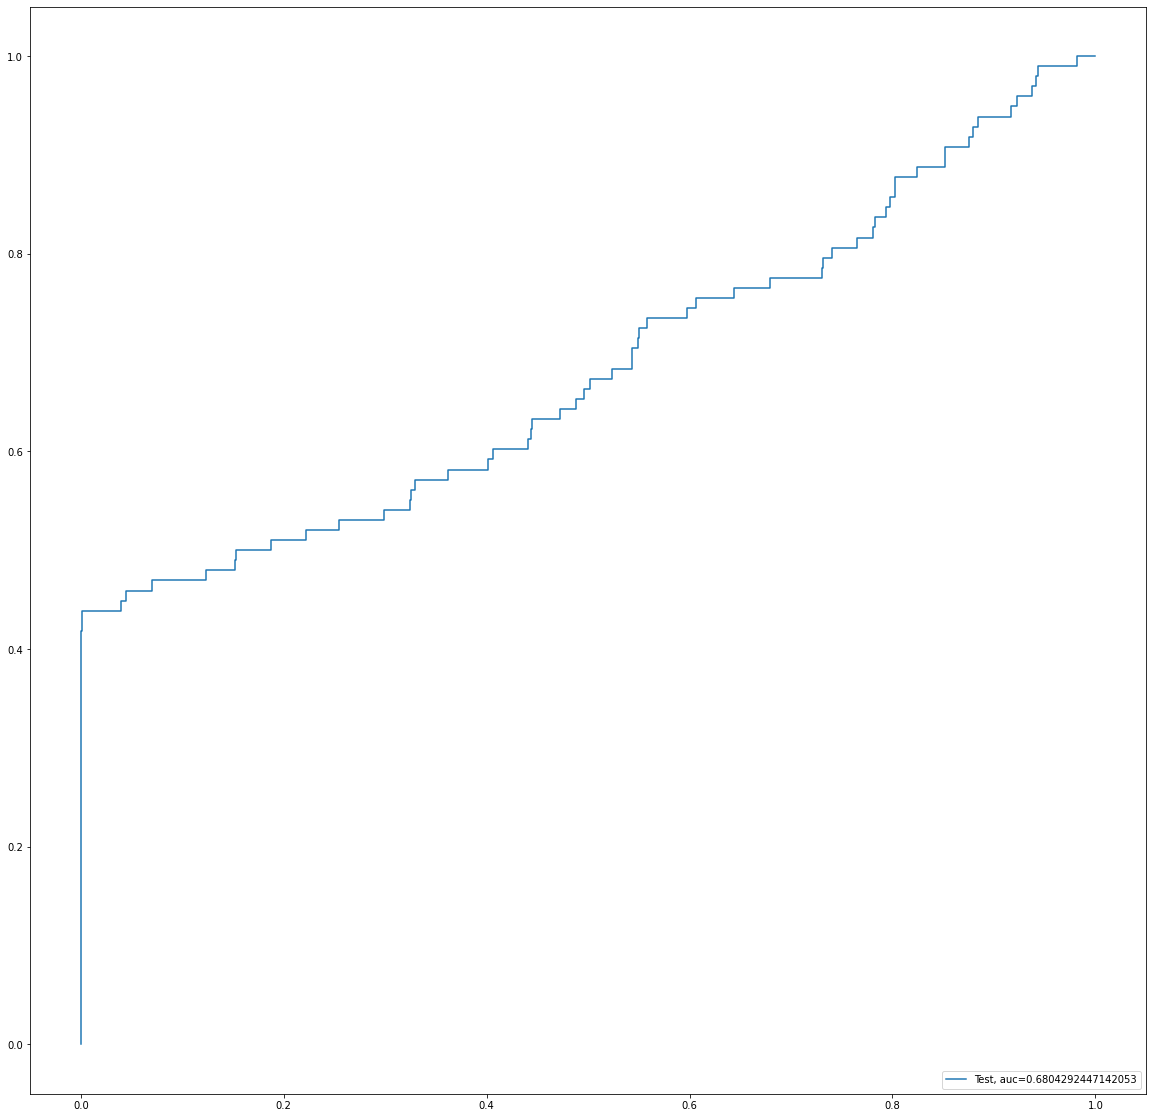

In [71]:
# Calculate roc auc
roc_value = roc_auc_score(y_test, svm_probs)
  
print("SVM roc_value: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("SVM threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling :- 
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset

In [72]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [73]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


**6. Logistic Regression using Random OverSampling**

In [74]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.9min finished


Best ROC AUC score:  0.9897021840017336
Best hyperparameters:  {'C': 1000}


In [75]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.515678,0.249975,0.055347,0.004718,0.01,{'C': 0.01},0.989314,0.989628,0.989671,0.989731,0.989341,0.989537,0.000174,6,0.989594,0.989498,0.989520,0.989549,0.989602,0.989553,0.000040
1,7.435064,0.110937,0.053090,0.001037,0.1,{'C': 0.1},0.989483,0.989806,0.989805,0.989919,0.989436,0.989690,0.000193,5,0.989762,0.989656,0.989671,0.989747,0.989683,0.989704,0.000043
2,7.481669,0.074142,0.051979,0.000524,1,{'C': 1},0.989470,0.989806,0.989852,0.989855,0.989498,0.989696,0.000174,2,0.989761,0.989673,0.989721,0.989681,0.989735,0.989714,0.000033
3,7.436969,0.142867,0.052577,0.001242,10,{'C': 10},0.989403,0.989801,0.989866,0.989884,0.989514,0.989694,0.000197,4,0.989711,0.989663,0.989735,0.989715,0.989747,0.989714,0.000029
4,7.503508,0.194456,0.052613,0.000732,100,{'C': 100},0.989425,0.989802,0.989844,0.989887,0.989521,0.989696,0.000186,3,0.989720,0.989663,0.989703,0.989716,0.989748,0.989710,0.000028
5,7.681339,0.396766,0.053701,0.001258,1000,{'C': 1000},0.989423,0.989832,0.989855,0.989857,0.989545,0.989702,0.000183,1,0.989712,0.989689,0.989715,0.989690,0.989777,0.989716,0.000032


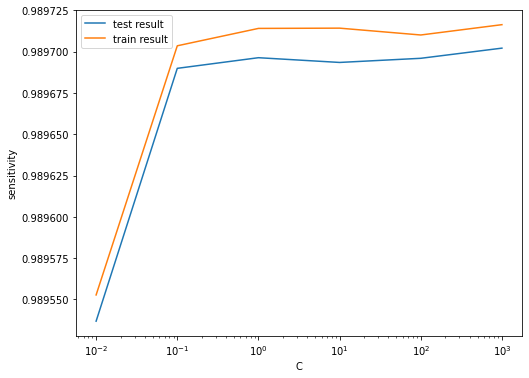

In [76]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [77]:
model_cv.best_params_


{'C': 1000}

In [78]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

In [79]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [80]:
# Printing scores
predict_scores(y_over, y_train_pred)

F1 Score: 94.87%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



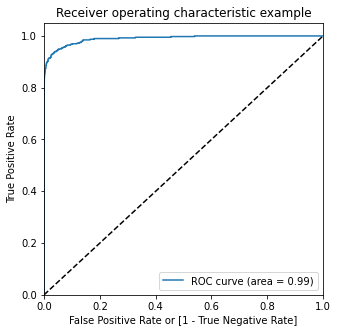

In [81]:
# Plotting the ROC curve
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
draw_roc(y_over, y_train_pred_proba)

In [82]:
# Printing the scores
y_test_pred = logreg_over_model.predict(X_test)
predict_scores(y_test, y_test_pred)

F1 Score: 9.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



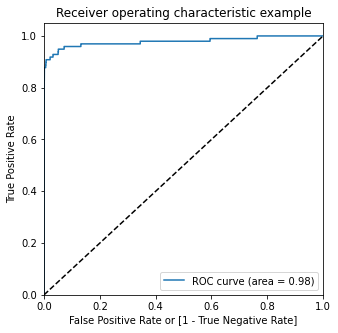

In [83]:
# Plotting the ROC curve
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

**7.XGBoost with Random OverSampling **

In [84]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 27.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [85]:
# Cross-validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,79.294673,2.089047,0.802997,0.004416,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999903,0.999895,0.999884,0.999894,0.000008,4,0.999907,0.999911,0.999898,0.999905,5.350978e-06
1,97.579269,4.992787,0.802646,0.008395,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999903,0.999902,0.999874,0.999893,0.000013,5,0.999898,0.999916,0.999908,0.999907,7.031040e-06
2,95.092241,1.163535,0.829322,0.049597,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999900,0.999898,0.999880,0.999893,0.000009,6,0.999906,0.999910,0.999910,0.999909,2.120297e-06
3,82.746846,1.822867,0.823997,0.009112,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999979,0.999974,0.999983,0.999979,0.000004,3,0.999998,0.999991,0.999996,0.999995,3.157229e-06
4,92.888377,1.631920,0.824378,0.007801,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999988,0.999990,0.999977,0.999985,0.000006,2,1.000000,0.999999,0.999998,0.999999,7.618338e-07
5,92.441492,1.518172,0.829723,0.008883,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999988,0.999992,0.999991,0.999990,0.000002,1,1.000000,0.999999,0.999999,0.999999,4.500587e-07


In [86]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999903057483867
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [87]:
# Getting the optimal parameters
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.9}

In [88]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [89]:
# Predictions score
y_train_pred = xgb_over_model.predict(X_over)
predict_scores(y_over, y_train_pred)

F1 Score: 99.74%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



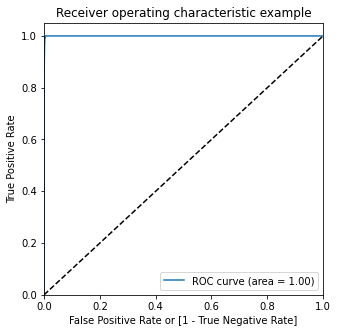

In [90]:
# Plotting the ROC curve
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]
draw_roc(y_over, y_train_pred_proba)

**8. Decision Tree with Random OverSampling**

In [93]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [94]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9988493746372695
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [95]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [96]:
# Predicting scores the train set
y_train_pred = dt_over_model.predict(X_over)
predict_scores(y_over, y_train_pred)

F1 Score: 99.27%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



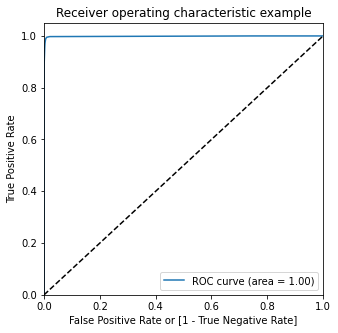

In [97]:
# Plotting the ROC curve
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
draw_roc(y_over, y_train_pred_proba)

In [99]:
# Predicting the scores on the test data
y_test_pred = dt_over_model.predict(X_test)
predict_scores(y_test, y_test_pred)

F1 Score: 22.19%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.82      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



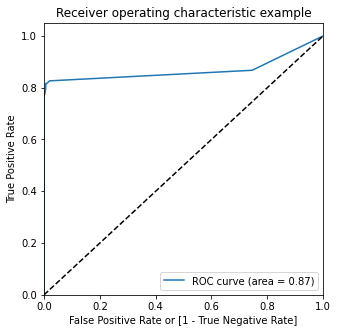

In [100]:
# Plotting the ROC Curve
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

**SMOTE**
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

### Print the class distribution after applying SMOTE 

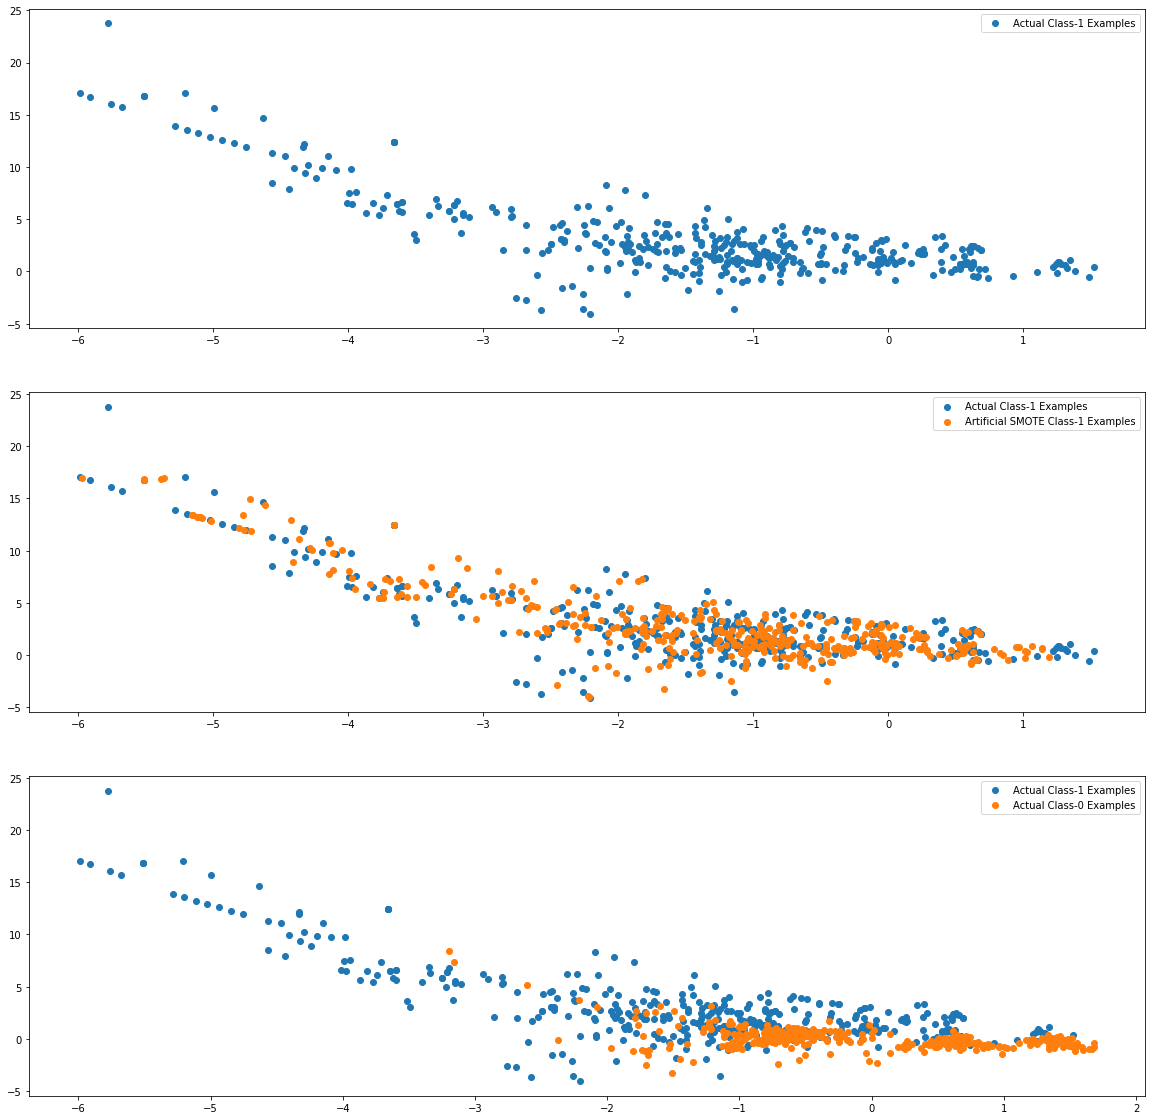

In [105]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()


plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

**9. Logistic Regression with SMOTE**

In [106]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.9min finished


Best ROC AUC score:  0.9926201894409189
Best hyperparameters:  {'C': 100}


In [107]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.178466,0.095675,0.057239,0.001529,0.01,{'C': 0.01},0.992218,0.992655,0.992556,0.992643,0.992557,0.992526,0.000159,6,0.992629,0.992505,0.992519,0.992461,0.992572,0.992537,0.000058
1,7.753521,0.696235,0.063043,0.007003,0.1,{'C': 0.1},0.992329,0.992710,0.992601,0.992756,0.992629,0.992605,0.000149,5,0.992733,0.992573,0.992573,0.992567,0.992648,0.992619,0.000065
2,7.604853,0.365015,0.060707,0.005961,1,{'C': 1},0.992333,0.992719,0.992610,0.992745,0.992632,0.992608,0.000146,3,0.992738,0.992578,0.992594,0.992560,0.992644,0.992623,0.000064
3,7.677315,0.485074,0.058096,0.002139,10,{'C': 10},0.992310,0.992749,0.992617,0.992737,0.992623,0.992607,0.000158,4,0.992713,0.992611,0.992593,0.992545,0.992625,0.992618,0.000055
4,7.406937,0.114717,0.056988,0.001115,100,{'C': 100},0.992326,0.992752,0.992594,0.992781,0.992649,0.992620,0.000162,1,0.992728,0.992613,0.992587,0.992590,0.992647,0.992633,0.000052
5,7.246600,0.214519,0.055654,0.000530,1000,{'C': 1000},0.992312,0.992754,0.992609,0.992760,0.992632,0.992613,0.000163,2,0.992719,0.992615,0.992592,0.992568,0.992632,0.992625,0.000052


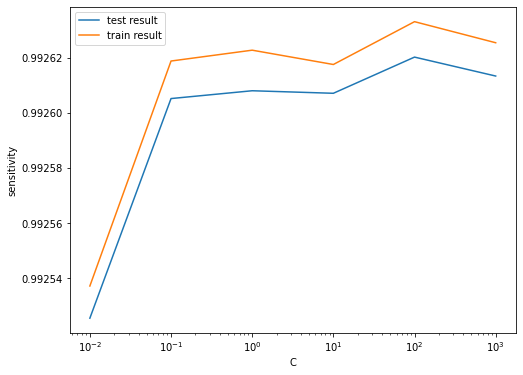

In [108]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [109]:
# Printing best parameters
model_cv.best_params_

{'C': 100}

In [110]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)
# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
# Predicting scores on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
predict_scores(y_train_smote, y_train_pred)

F1 Score: 95.17%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



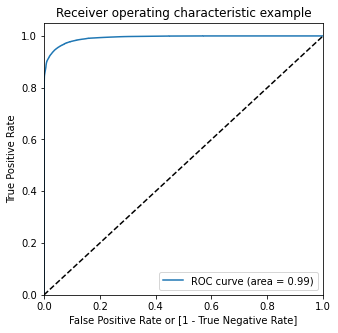

In [112]:
# Plotting the ROC curve
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [113]:
# Predicting the scores
y_test_pred = logreg_smote_model.predict(X_test)
predict_scores(y_test, y_test_pred)

F1 Score: 10.11%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



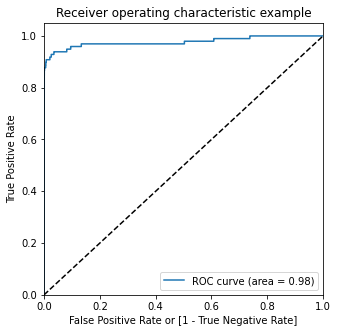

In [114]:
# Plotting the ROC Curve
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba_smote)

**10. XGBoost with SMOTE**

In [115]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 32.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [116]:
# Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,88.372234,1.354772,0.811679,0.009839,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999789,0.999826,0.999786,0.999800,0.000018,4,0.999822,0.999828,0.999827,0.999826,2.902323e-06
1,110.018100,0.676583,0.808080,0.004689,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999789,0.999814,0.999760,0.999788,0.000022,6,0.999825,0.999804,0.999809,0.999813,8.878904e-06
2,115.757756,3.363921,0.810028,0.006315,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999792,0.999821,0.999784,0.999799,0.000016,5,0.999821,0.999826,0.999822,0.999823,2.061993e-06
3,88.926330,0.858641,0.828977,0.006865,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999980,0.999980,0.999972,0.999978,0.000004,3,0.999991,0.999992,0.999990,0.999991,7.664876e-07
4,114.429211,0.731348,0.825219,0.012929,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999980,0.999983,0.999972,0.999978,0.000004,2,0.999996,0.999993,0.999991,0.999993,2.071143e-06
5,114.115258,0.816840,0.814291,0.004901,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999983,0.999984,0.999978,0.999982,0.000002,1,0.999996,0.999993,0.999995,0.999995,1.260477e-06


In [117]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999817282197712
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [118]:
# Getting the optimal parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [119]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [120]:
# Predicting the scores
y_train_pred = xgb_smote_model.predict(X_train_smote)
predict_scores(y_train_smote, y_train_pred)

F1 Score: 98.28%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227451
           1       0.99      0.97      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



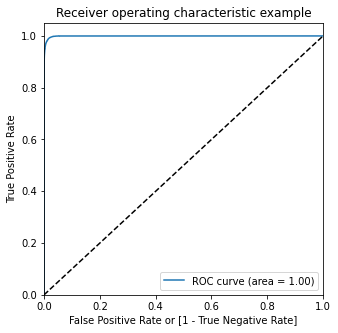

In [121]:
# Plotting the ROC Curve
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba)

**11. Decision Tree with SMOTE**

In [124]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [125]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9975001482295748
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [126]:
# GEtting the Optimal Parameters
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [127]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [128]:
# Predicting the scores train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
predict_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.67%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



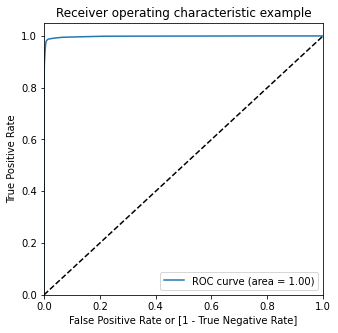

In [129]:
# Plotting the ROC Curve
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
draw_roc(y_train_smote, y_train_pred_proba)

In [130]:
# Predicting the scores 
y_pred = dt_smote_model.predict(X_test)
predict_scores(y_test, y_pred)

F1 Score: 19.63%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.88      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.60     56962
weighted avg       1.00      0.99      0.99     56962



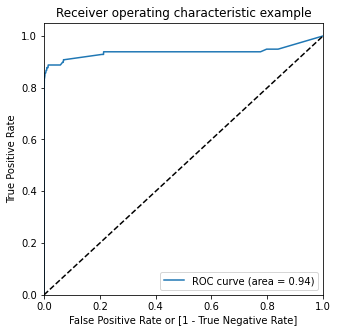

In [131]:
# Plotting the ROC curve
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_smote)

**ADASYN** :- 

Image result for adasyn
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

### Print the class distribution after applying ADASYN

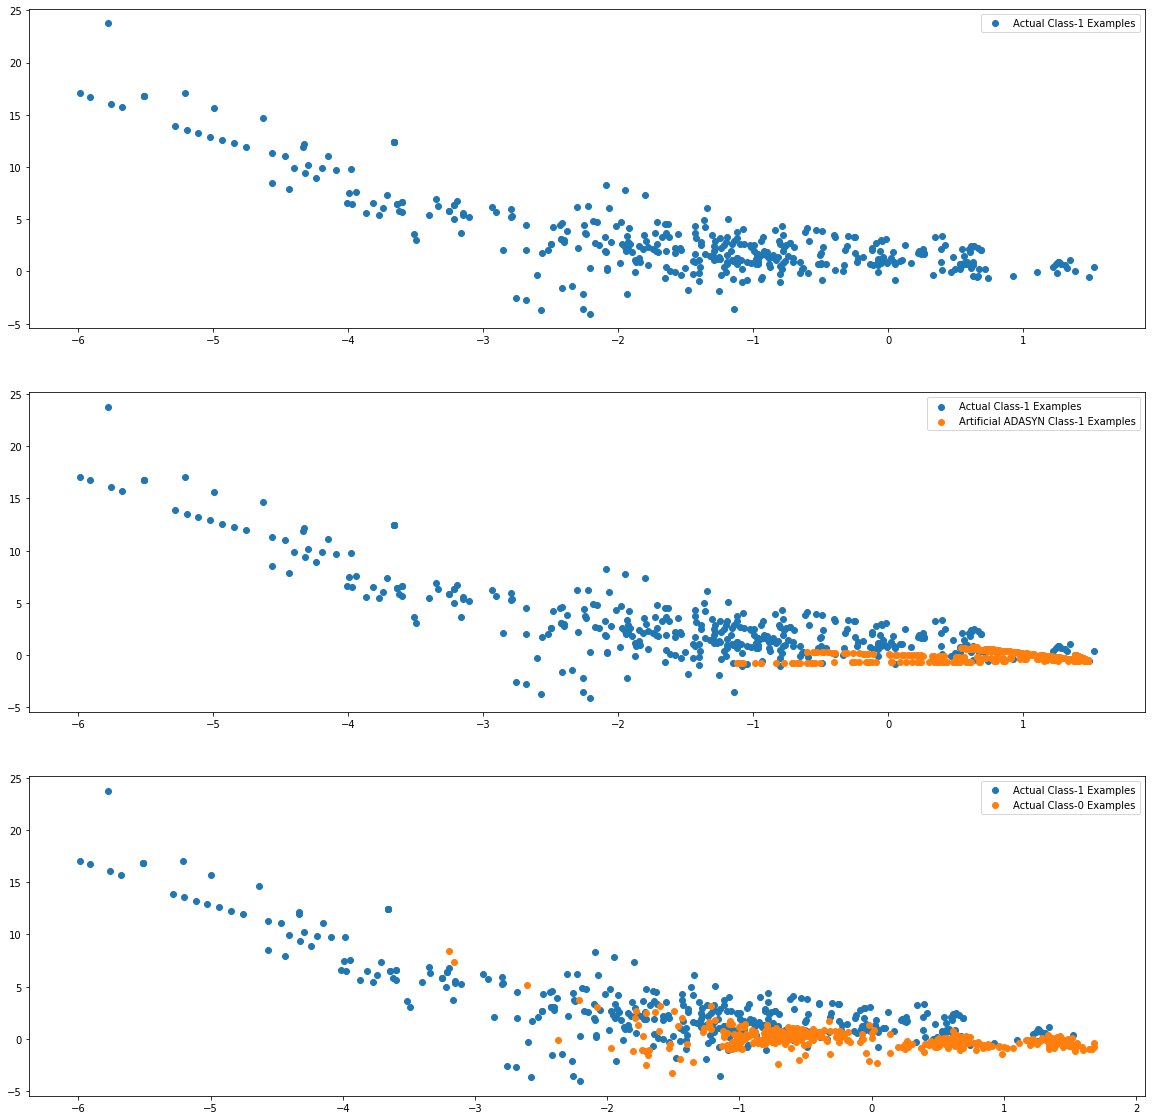

In [133]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

#plt.subplot(3, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
#            label='Artificial ADASYN Class-1 Examples')
#plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

**12 . Logistic Regression with ADASYN**

In [134]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.9min finished


Best ROC AUC score:  0.9768230493739258
Best hyperparameters:  {'C': 0.1}


In [135]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.097041,0.128376,0.094469,0.001487,0.01,{'C': 0.01},0.976380,0.976974,0.976857,0.976737,0.000257,5,0.977018,0.976606,0.976698,0.976774,0.000177
1,5.927766,0.100392,0.094649,0.002412,0.1,{'C': 0.1},0.976355,0.977047,0.977067,0.976823,0.000331,1,0.977013,0.976692,0.976873,0.976859,0.000131
2,6.162109,0.217659,0.096030,0.004806,1,{'C': 1},0.976348,0.977012,0.976982,0.976781,0.000306,3,0.977007,0.976663,0.976799,0.976823,0.000142
3,6.093325,0.384512,0.101535,0.010268,10,{'C': 10},0.976311,0.977142,0.976920,0.976791,0.000351,2,0.976983,0.976784,0.976741,0.976836,0.000106
4,6.163129,0.453102,0.097982,0.002506,100,{'C': 100},0.976329,0.976986,0.976857,0.976724,0.000284,6,0.976982,0.976623,0.976659,0.976755,0.000162
5,5.955705,0.059852,0.095561,0.002369,1000,{'C': 1000},0.976370,0.977035,0.976930,0.976778,0.000292,4,0.977041,0.976680,0.976725,0.976816,0.000161


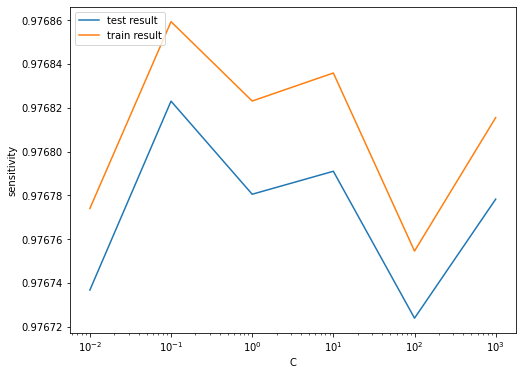

In [136]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [137]:
# Selecting the best parameters
model_cv.best_params_

{'C': 0.1}

In [138]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)
# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
# Predicting scores on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
predict_scores(y_train_adasyn, y_train_pred)

F1 Score: 91.4%
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92    227451
           1       0.92      0.91      0.91    227449

    accuracy                           0.91    454900
   macro avg       0.91      0.91      0.91    454900
weighted avg       0.91      0.91      0.91    454900



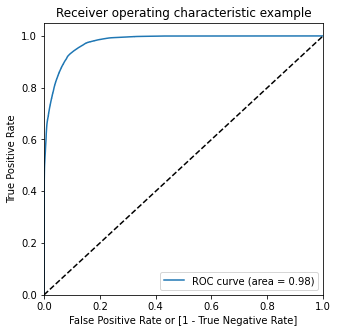

In [140]:
# Plotting the ROC Curve
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn, y_train_pred_proba)

In [141]:
# Predicting scores
y_pred = logreg_adasyn_model.predict(X_test)
predict_scores(y_test, y_pred)

F1 Score: 4.04%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.94      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.92      0.96     56962



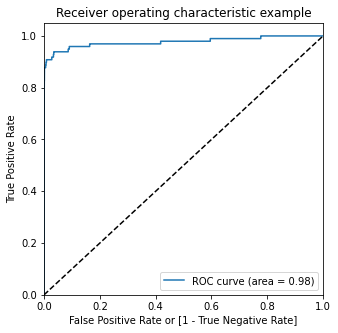

In [142]:
# Plotting the ROC Curve
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

**13. XGBoost with ADASYN**

In [143]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 33.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [144]:
# Cross-Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,86.896429,1.482389,0.837260,0.015710,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.998394,0.980106,0.998922,0.992474,0.008748,5,0.999615,0.999648,0.999535,0.999599,0.000048
1,113.872555,4.616553,0.837277,0.007344,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.998285,0.979607,0.998977,0.992290,0.008972,6,0.999588,0.999641,0.999542,0.999591,0.000040
2,119.825557,1.003580,0.837715,0.002827,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.998343,0.980947,0.998933,0.992741,0.008343,4,0.999601,0.999635,0.999534,0.999590,0.000042
3,92.437618,0.302481,0.855155,0.004353,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999719,0.989155,0.999643,0.996172,0.004962,2,0.999982,0.999968,0.999966,0.999972,0.000007
4,115.739487,1.541827,0.839264,0.015418,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999640,0.986589,0.999843,0.995357,0.006200,3,0.999987,0.999974,0.999989,0.999983,0.000007
5,116.476213,0.751712,0.844634,0.015526,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999784,0.991034,0.999768,0.996862,0.004121,1,0.999988,0.999976,0.999988,0.999984,0.000006


In [145]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.996862093891222
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [146]:
# Getting the optimal parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [147]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [149]:
# Predicting the scores
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
predict_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.34%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    227451
           1       0.98      0.99      0.98    227449

    accuracy                           0.98    454900
   macro avg       0.98      0.98      0.98    454900
weighted avg       0.98      0.98      0.98    454900



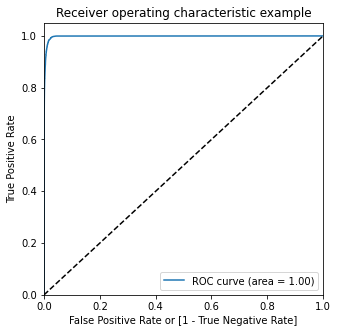

In [150]:
# Plotting the ROC Curve
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn, y_train_pred_proba)

**14. Decision tree with ADASYN**

In [154]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [155]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9667665813345796
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [156]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [157]:
# Predicting the scores on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
predict_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.88%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227451
           1       0.97      0.99      0.98    227449

    accuracy                           0.98    454900
   macro avg       0.98      0.98      0.98    454900
weighted avg       0.98      0.98      0.98    454900



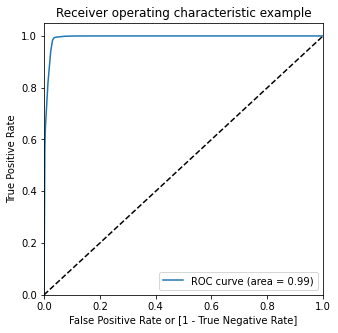

In [158]:
# Plotting the ROC Curve
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
draw_roc(y_train_adasyn, y_train_pred_proba)

In [159]:
# Predicting the scores
y_pred = dt_adasyn_model.predict(X_test)
predict_scores(y_test, y_pred)

F1 Score: 8.21%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.91      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962



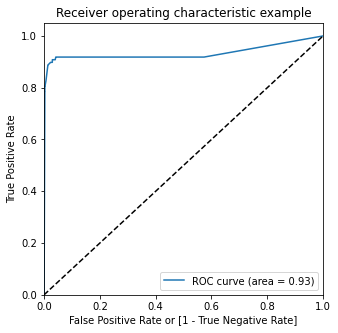

In [160]:
# Plotting the ROC Curve
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 30


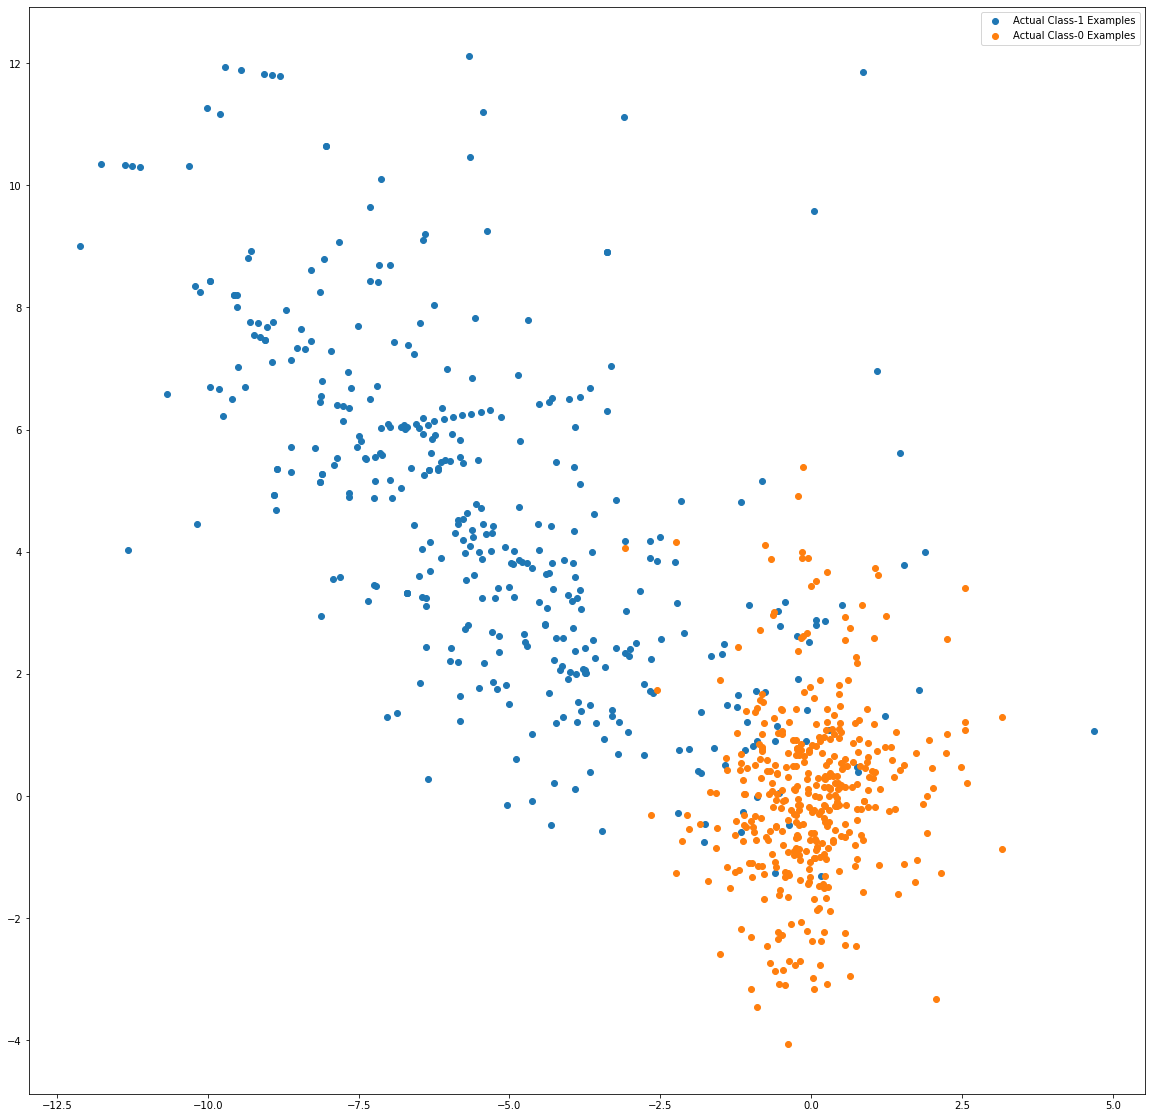

In [161]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [162]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9931504331258676
0.5


## Model Selection

After Performing Model Building and Evaluation of 14 Models . We observe that XGBoost Model with ADASYN Technique gives us the best results with ROC Curve(100%) and also a Recall of (98%) 